# Exploratory Data Analysis and Cleaning

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load data
personal_tracks = pd.read_csv('../data/intermediate/personal_tracks.csv')
personal_tracks.head()

,track_name,artist_name,album_name,popularity,duration_ms,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,favorite_song
0,Sail,AWOLNATION,Megalithic Symphony,74,259093,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.44100,0.615000,0.0964,0.272,119.051,4,1
1,Remember the Name (feat. Styles of Beyond),Fort Minor,Petrified / Remember the Name,67,230493,2005-11-15,0.688,0.835,8,-4.162,1,0.0911,0.05830,0.000003,0.0795,0.880,84.858,4,1
2,Around the World - Radio Edit [Radio Edit],Daft Punk,"Musique, Vol. 1",45,241467,1997-04-11,0.934,0.760,7,-5.549,1,0.1480,0.00417,0.906000,0.0656,0.864,121.302,4,0
3,Club Foot,Kasabian,Kasabian,62,214373,2004-01-30,0.238,0.919,0,-6.893,1,0.0816,0.02570,0.000023,0.0914,0.123,101.752,4,1
4,I Can't Hold Back,Survivor,Survivor Greatest Hits,54,238800,1984-01-01,0.509,0.681,4,-10.659,1,0.0306,0.49900,0.000054,0.1000,0.330,143.645,4,1


## Univariate Analysis 

In [9]:
# summary of dataframe 
personal_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        8764 non-null   object 
 1   artist_name       8764 non-null   object 
 2   album_name        8764 non-null   object 
 3   popularity        8764 non-null   int64  
 4   duration_ms       8764 non-null   int64  
 5   release_date      8764 non-null   object 
 6   danceability      8764 non-null   float64
 7   energy            8764 non-null   float64
 8   key               8764 non-null   int64  
 9   loudness          8764 non-null   float64
 10  mode              8764 non-null   int64  
 11  speechiness       8764 non-null   float64
 12  acousticness      8764 non-null   float64
 13  instrumentalness  8764 non-null   float64
 14  liveness          8764 non-null   float64
 15  valence           8764 non-null   float64
 16  tempo             8764 non-null   float64


In [7]:
# numerical columns 
personal_tracks.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,favorite_song
count,8764.000000,8.764000e+03,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000,8764.000000
mean,64.139092,2.233307e+05,0.624230,0.602116,5.266773,-7.551647,0.626312,0.093905,0.281675,0.048441,0.180154,0.482102,118.986144,3.945002,0.202077
std,13.109731,5.874853e+04,0.153634,0.210892,3.597746,4.083898,0.483810,0.096656,0.293576,0.180442,0.142847,0.232800,28.656545,0.343421,0.401572
min,0.000000,3.330700e+04,0.000000,0.000020,0.000000,-54.376000,0.000000,0.000000,0.000003,0.000000,0.021000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,1.898732e+05,0.527000,0.467000,2.000000,-8.794250,0.000000,0.036500,0.037675,0.000000,0.096300,0.301000,96.968750,4.000000,0.000000
50%,66.000000,2.165800e+05,0.638000,0.626500,5.000000,-6.636000,1.000000,0.051900,0.163000,0.000001,0.122000,0.472000,118.405500,4.000000,0.000000
75%,73.000000,2.478225e+05,0.733000,0.764000,8.000000,-5.040000,1.000000,0.104000,0.469000,0.000300,0.218000,0.661000,136.202250,4.000000,0.000000
max,100.000000,1.116933e+06,0.980000,0.993000,11.000000,0.496000,1.000000,0.925000,0.996000,1.000000,0.994000,0.989000,243.372000,5.000000,1.000000


In [16]:
# categorical columns
personal_tracks.describe(include='O')

,track_name,artist_name,album_name,release_date
count,8764,8764,8764,8764
unique,8099,2837,5840,2606
top,Home,Drake,Greatest Hits,2013-01-01
freq,8,129,22,139


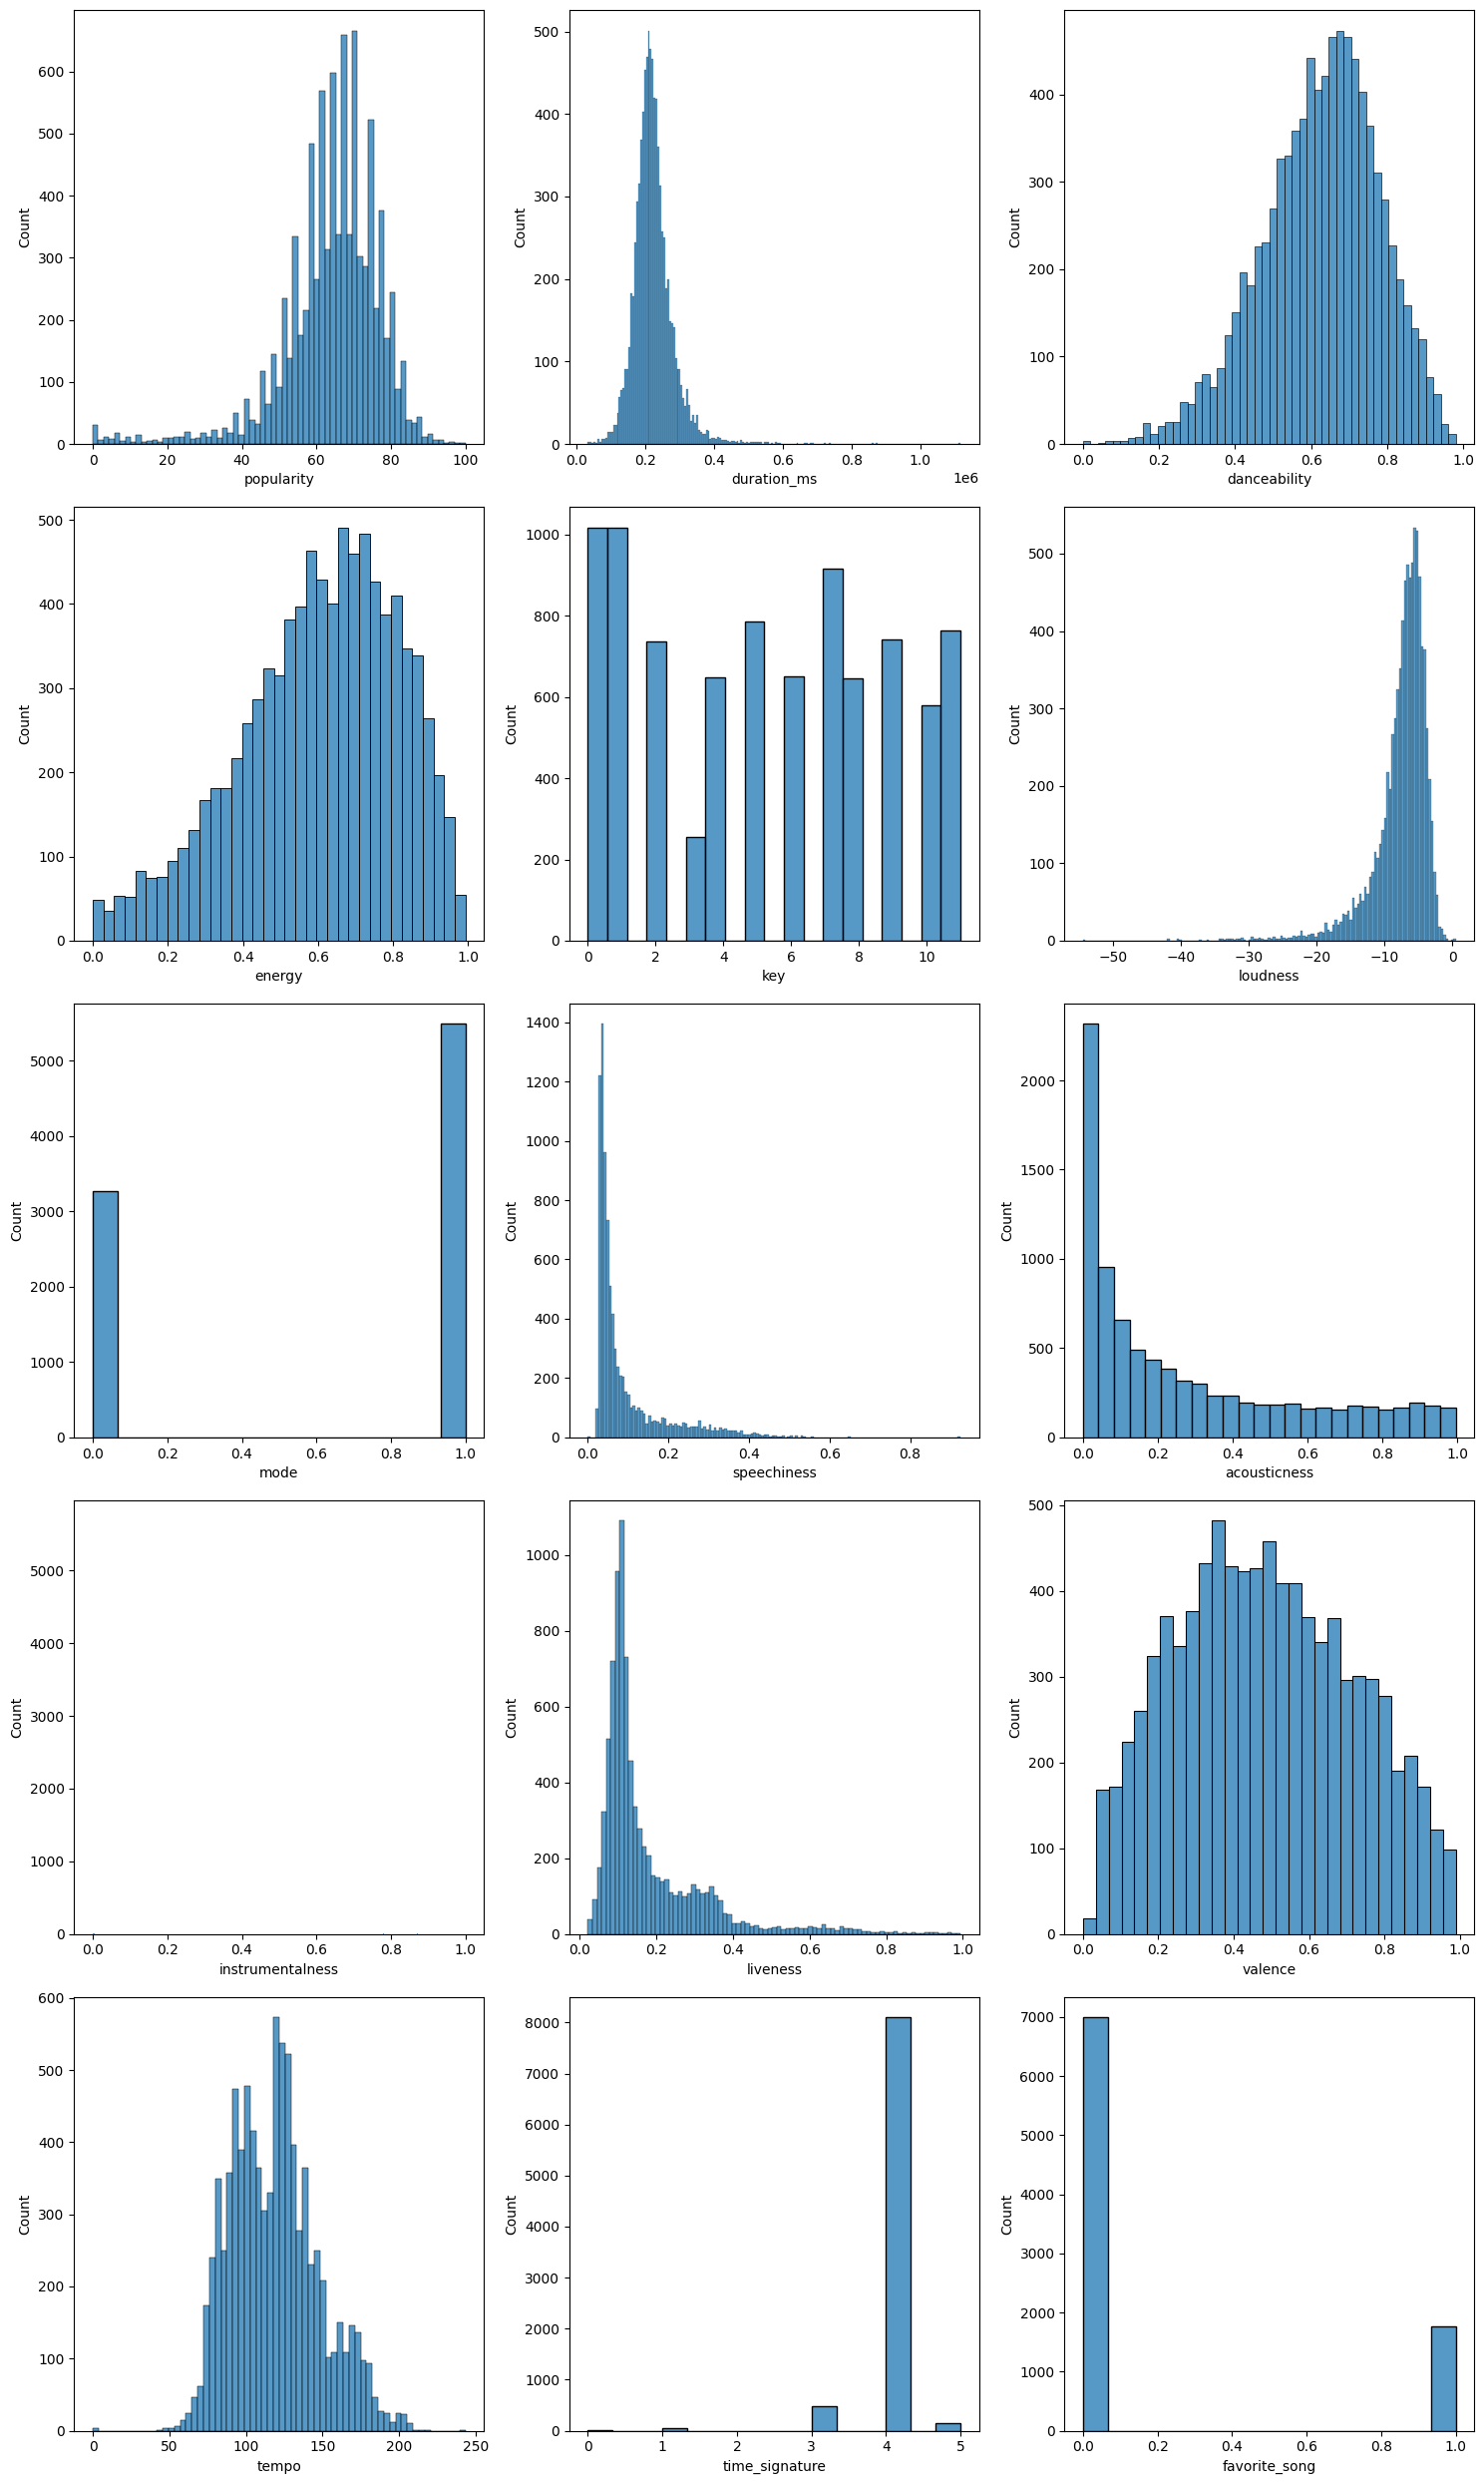

In [19]:
# histogram of numerical columns 
cols = 3
rows = 5
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'favorite_song']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(numerical_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = personal_tracks[col], ax = ax)
fig.tight_layout()  
plt.show()

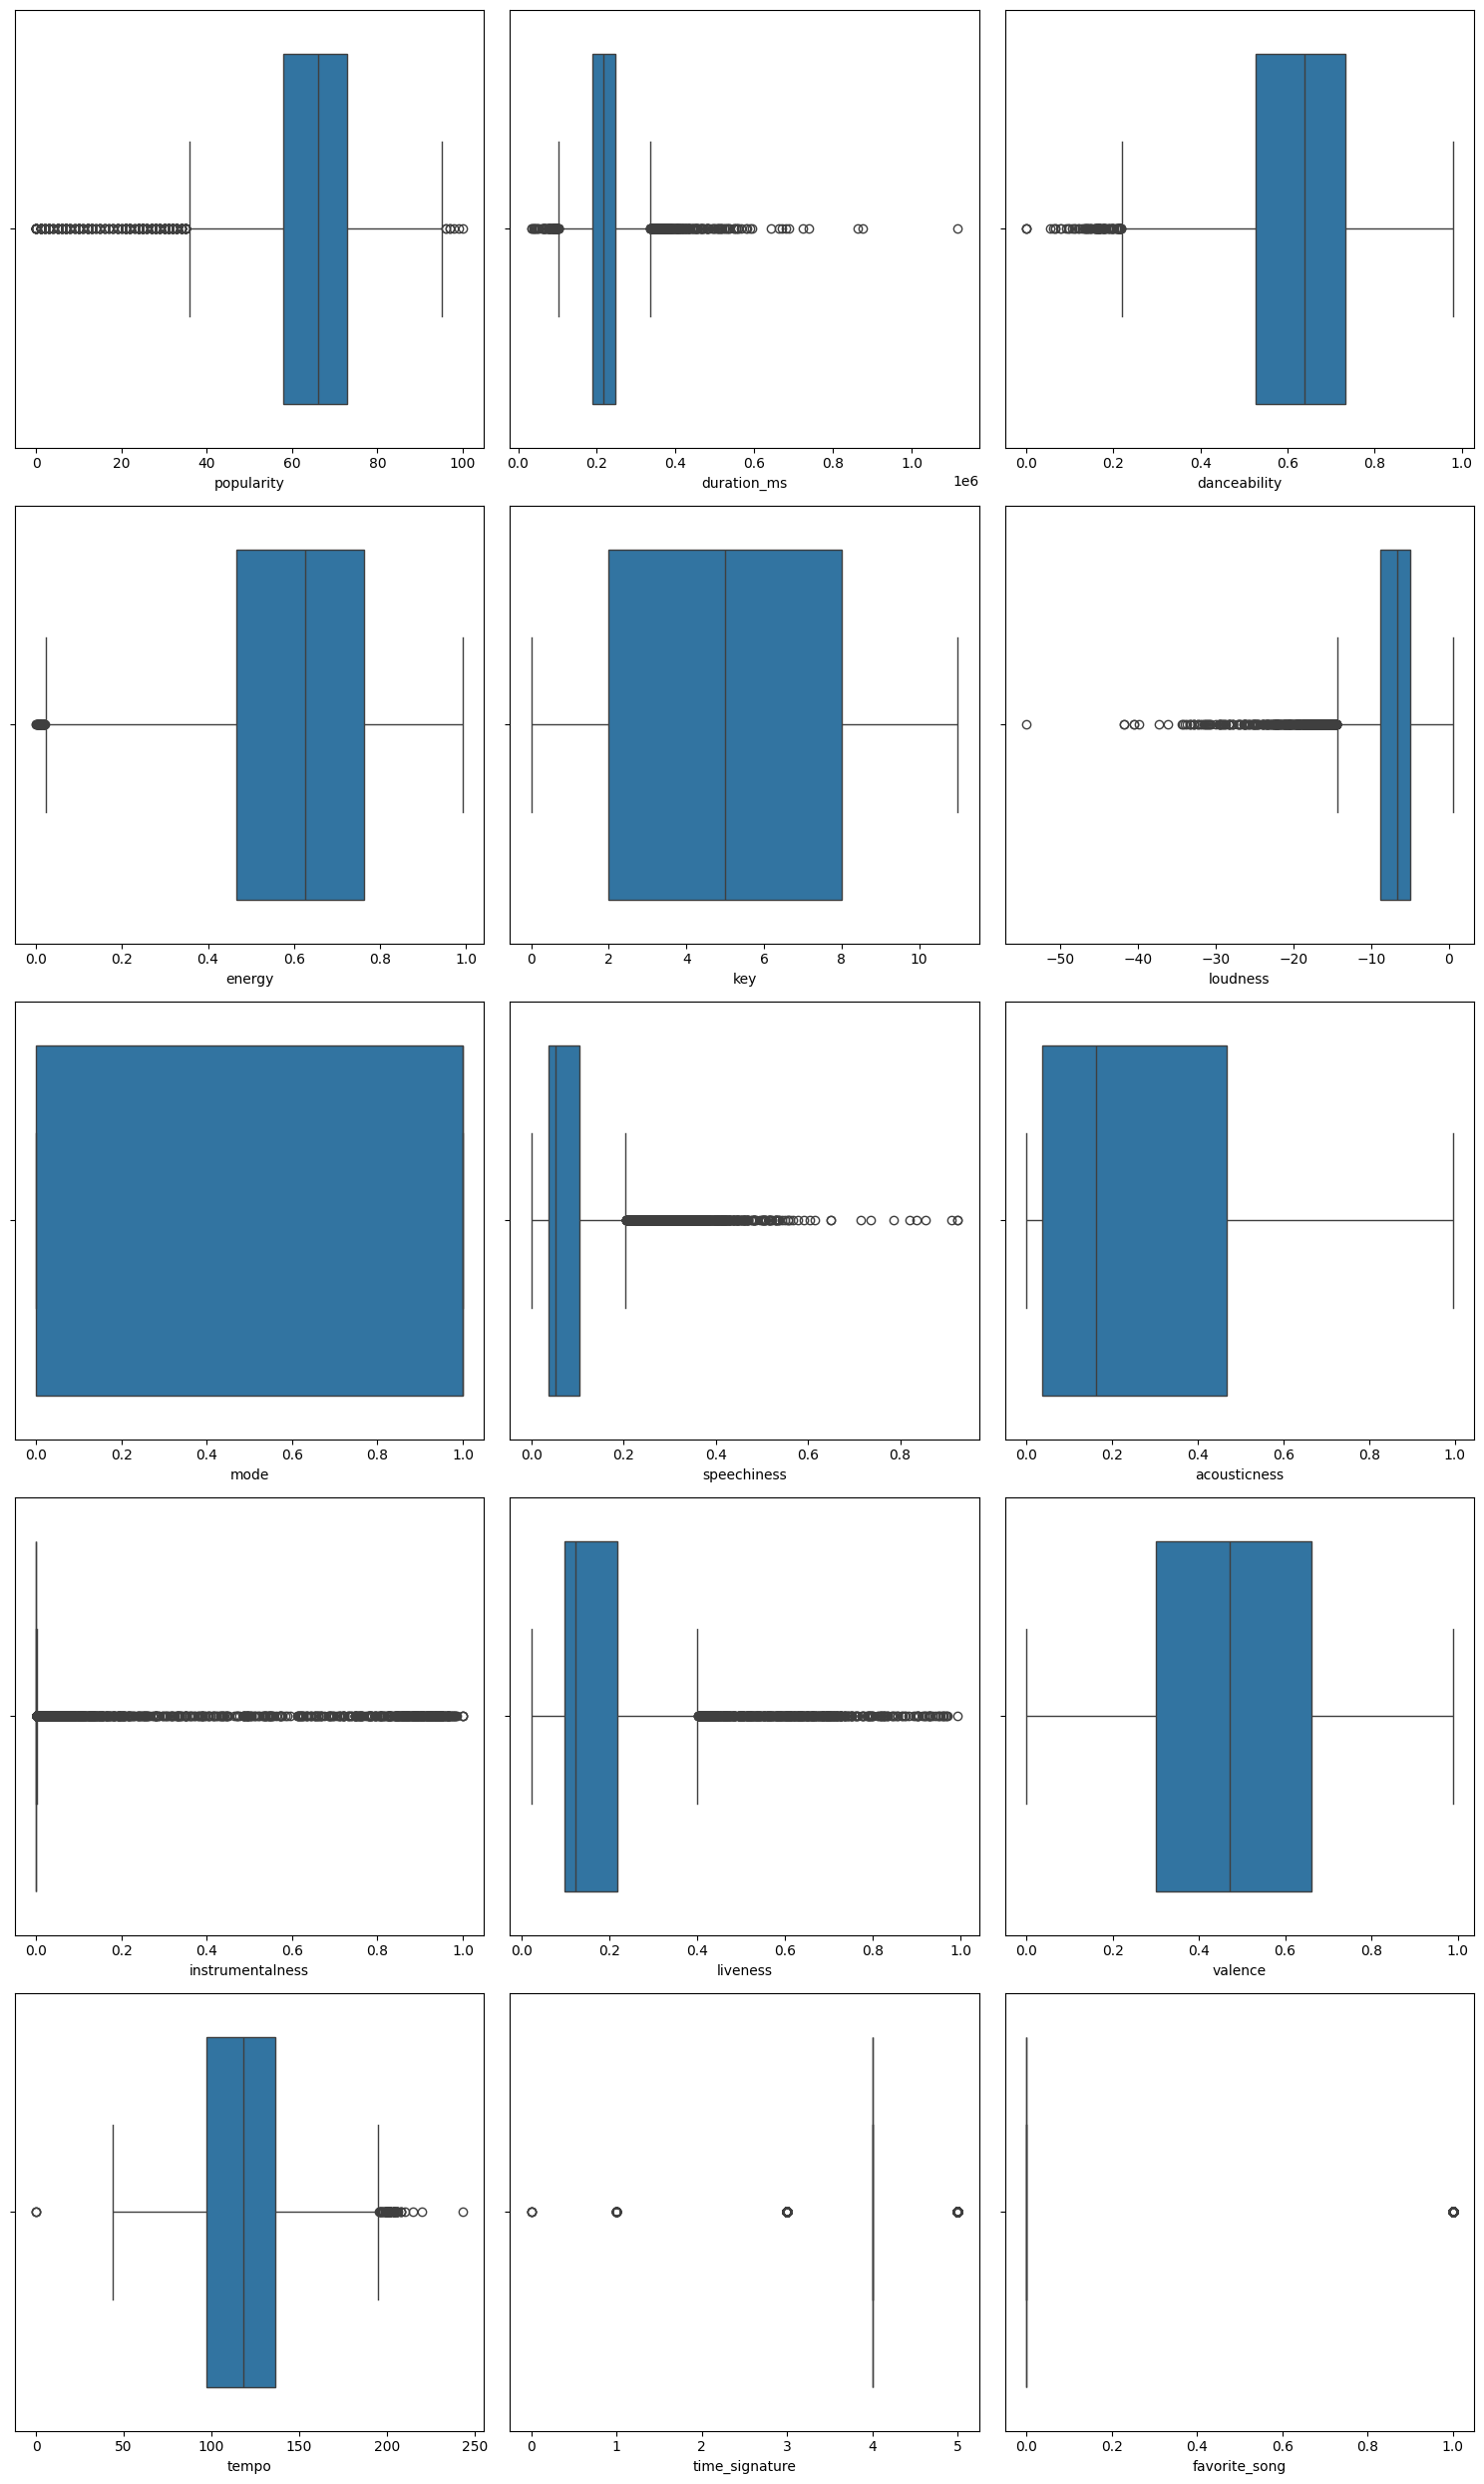

In [20]:
# boxplot of numerical columns 
cols = 3
rows = 5
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'favorite_song']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(numerical_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = personal_tracks[col], ax = ax)
fig.tight_layout()  
plt.show()

With the histogram and boxplots, we get a good idea of the distribution of all numerical values in the dataset, which means we can get a snapshot of what preferences I have for music. However, it is important to note that the boxplots show a huge prevalance of outliers. Additionally, this is just univariate analysis and does not show the relationship with the target variable.

Avoiding univariate analysis for categorical variables because there are too many unique values. Also, may not use categorical features for the model, except release date.

## Bivariate Analysis
Understanding the relationship between feature and target variable.

In [22]:
personal_tracks['favorite_song'] = personal_tracks['favorite_song'].astype(str)

In [24]:
# Popularity
personal_tracks.groupby(by=['favorite_song'])['popularity'].mean()

favorite_song
0    62.558559
1    70.380011
Name: popularity, dtype: float64

In [25]:
personal_tracks['popularity'].std()

13.109731179545076

In [26]:
# Duration_ms
personal_tracks.groupby(by=['favorite_song'])['duration_ms'].mean()

favorite_song
0    223170.310882
1    223963.845285
Name: duration_ms, dtype: float64

In [27]:
personal_tracks['duration_ms'].std()

58748.53440423421